In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 108.7 MB/s eta 0:00:00


--- |0> ---
After Hadamard: [0.70710678+0.j 0.70710678+0.j]


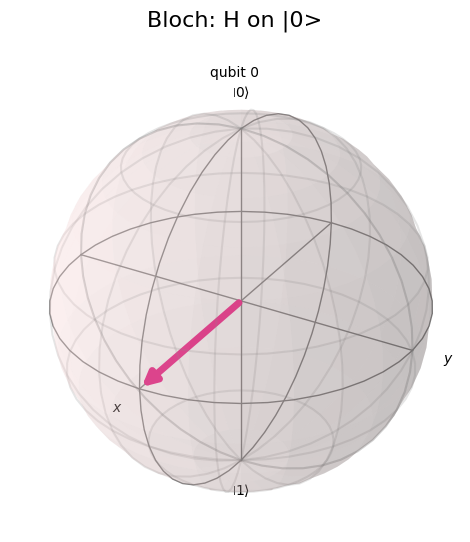

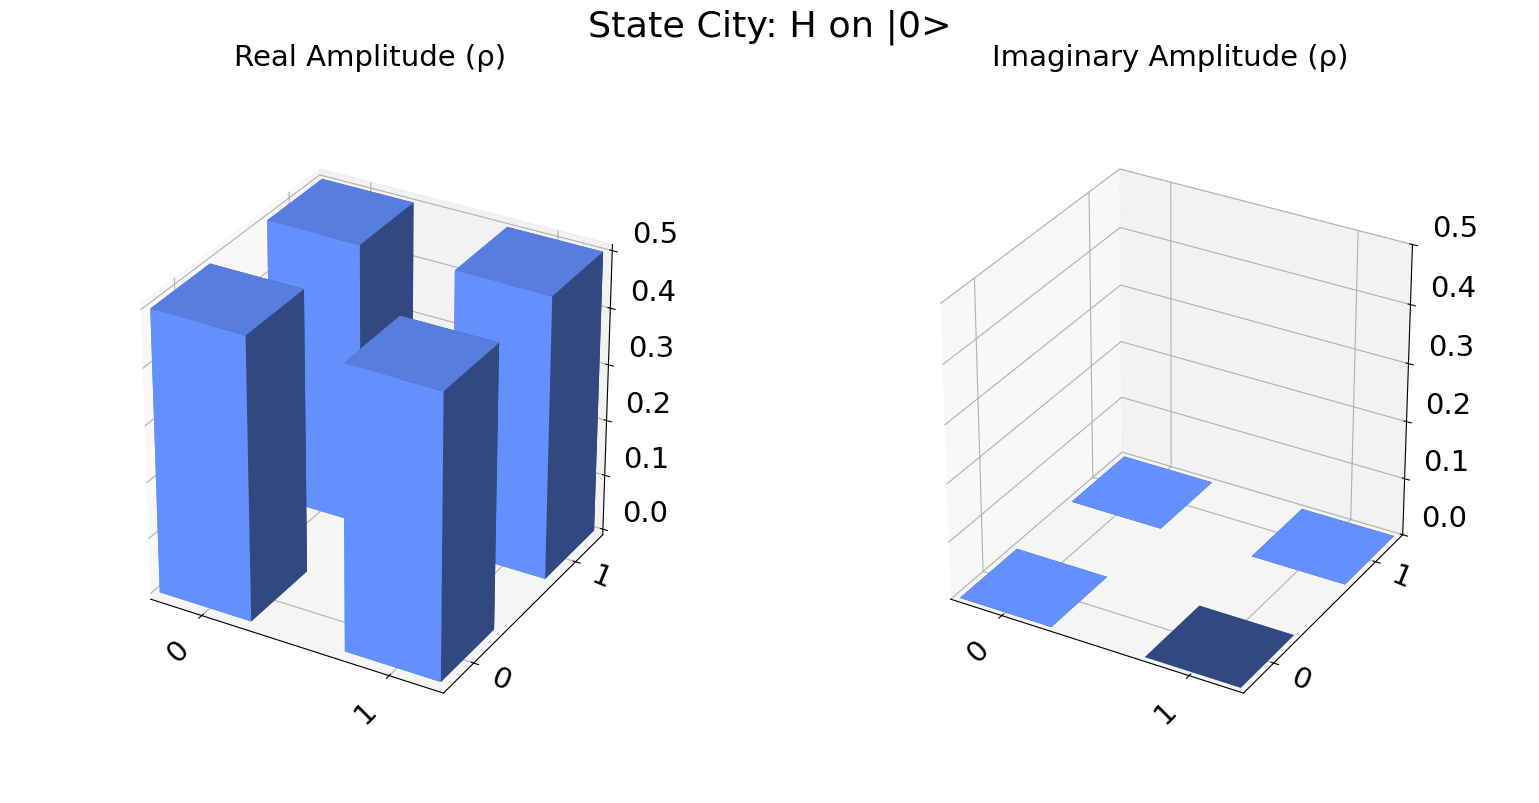

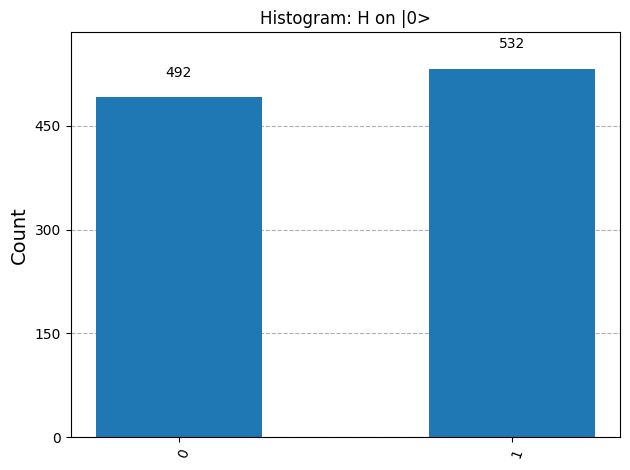



--- |1> ---
After Hadamard: [ 0.70710678+0.j -0.70710678+0.j]


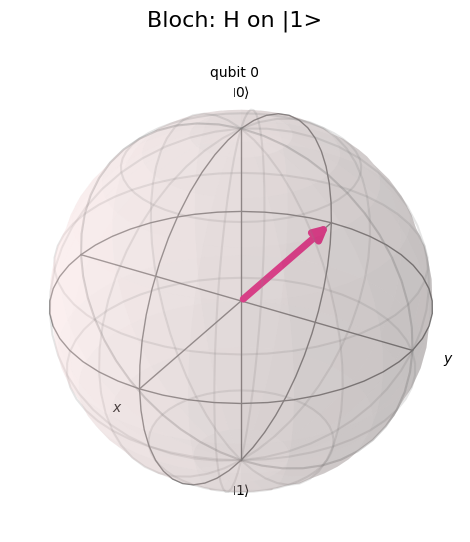

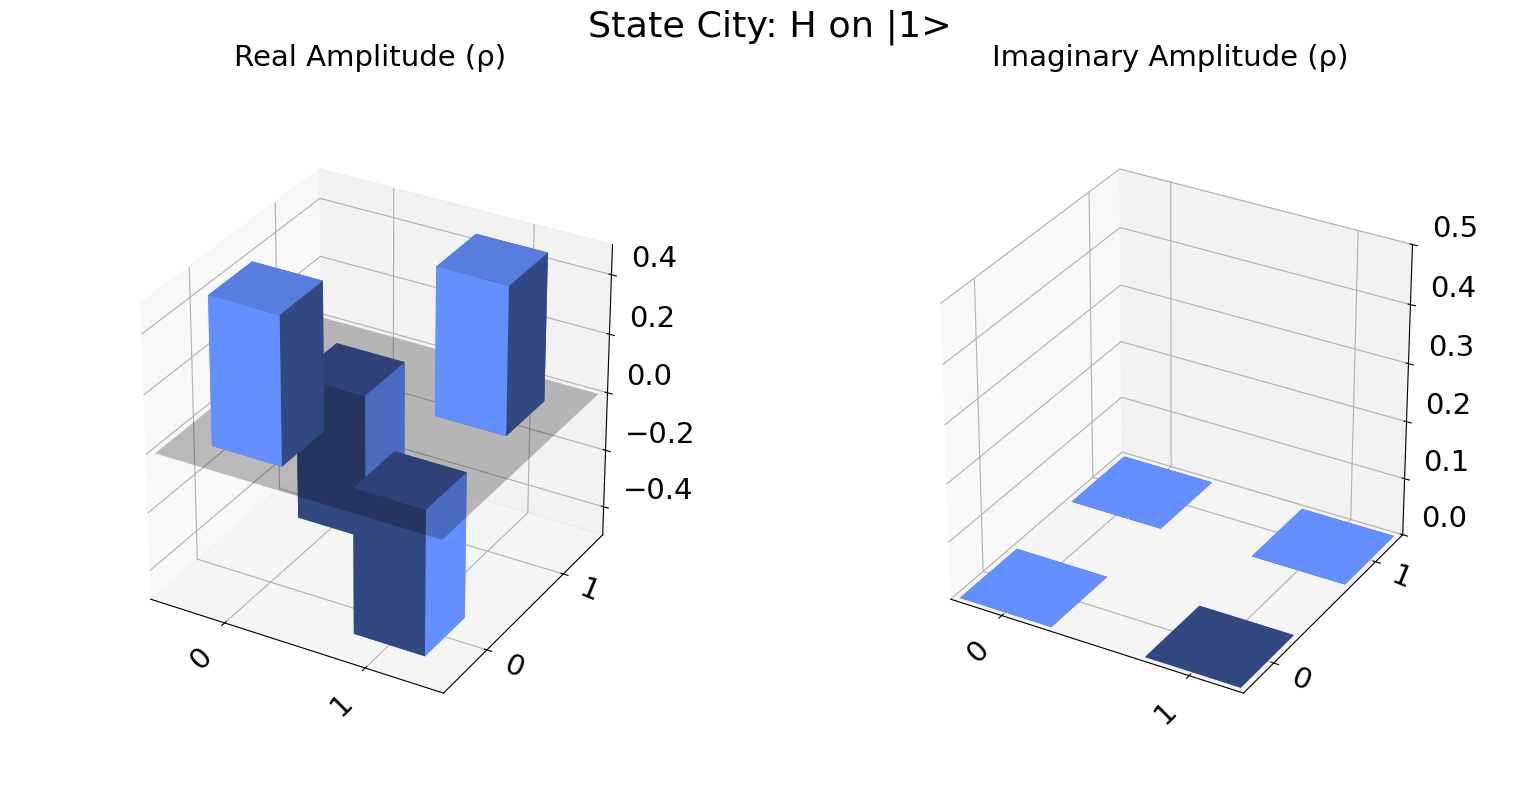

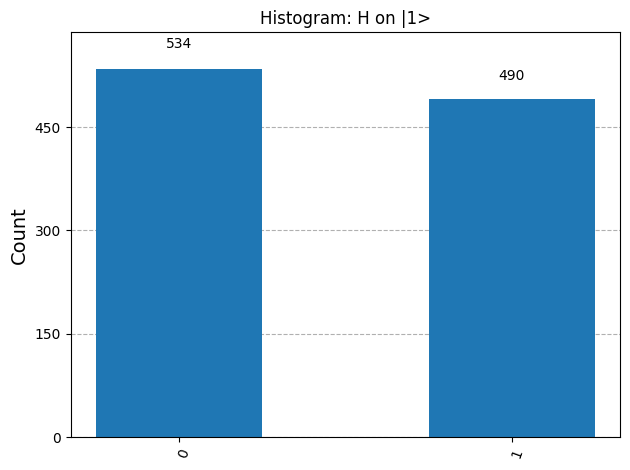



--- |+> ---
After Hadamard: [1.+0.j 0.+0.j]


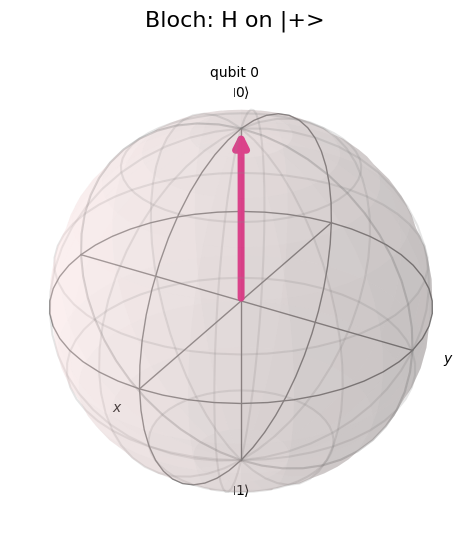

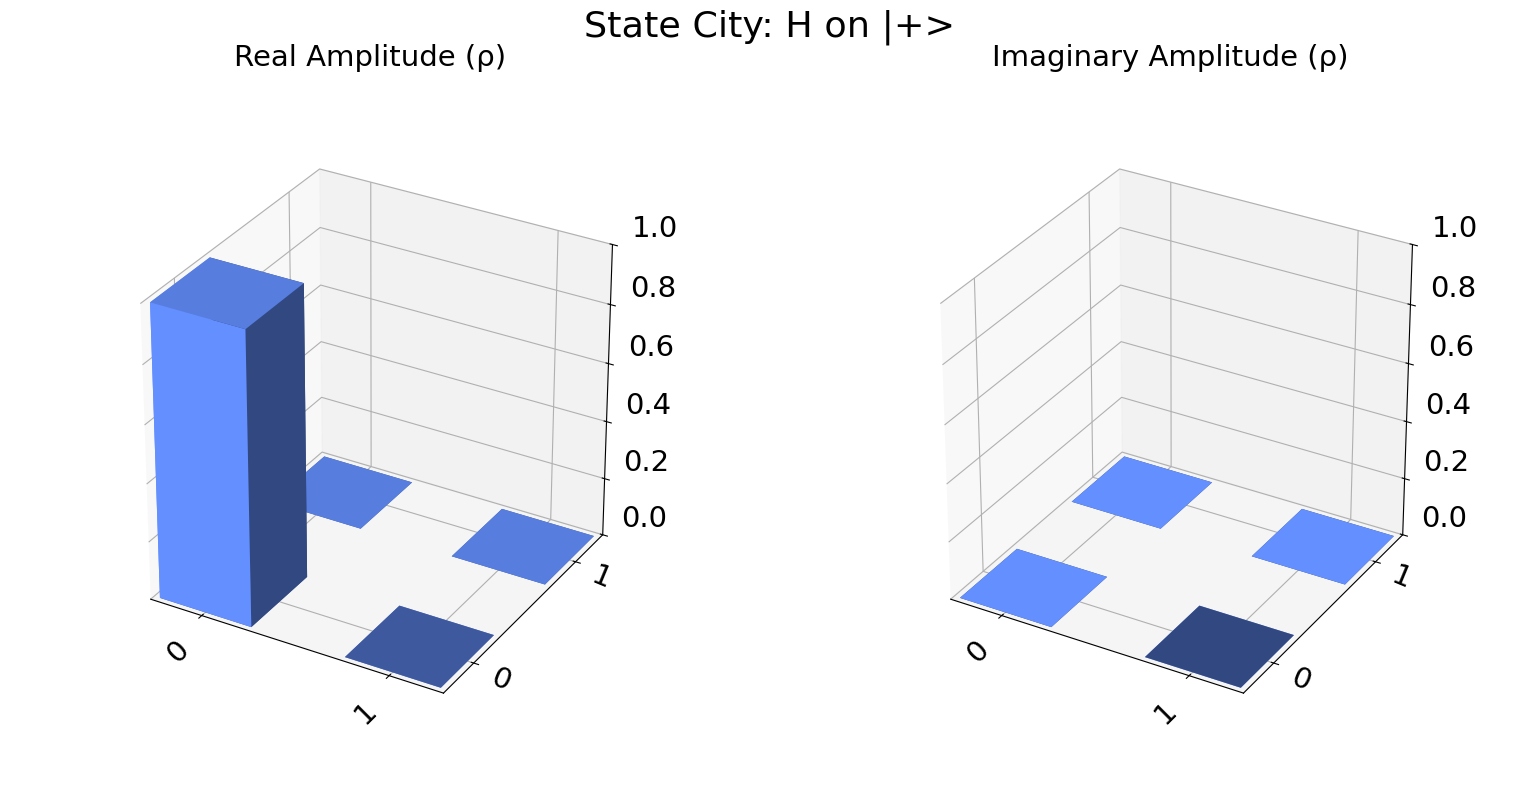

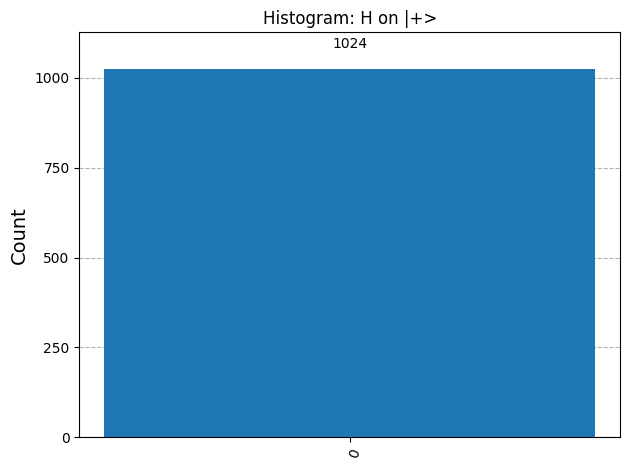



--- |-> ---
After Hadamard: [0.+0.j 1.+0.j]


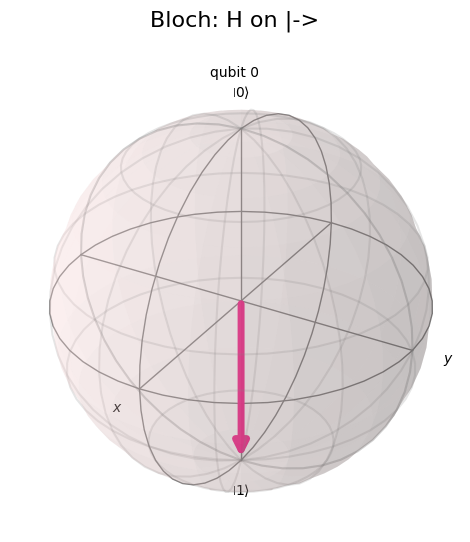

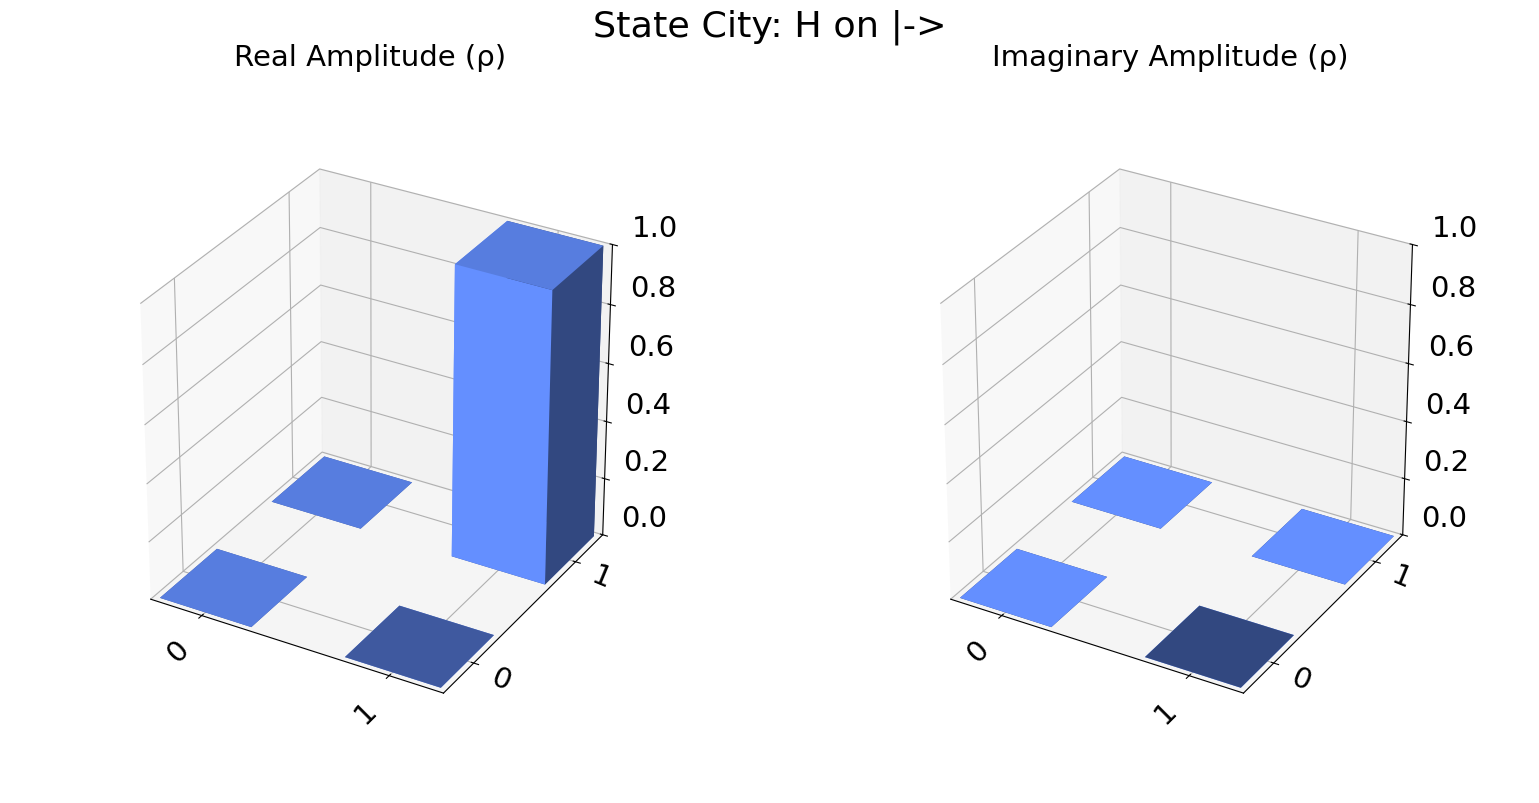

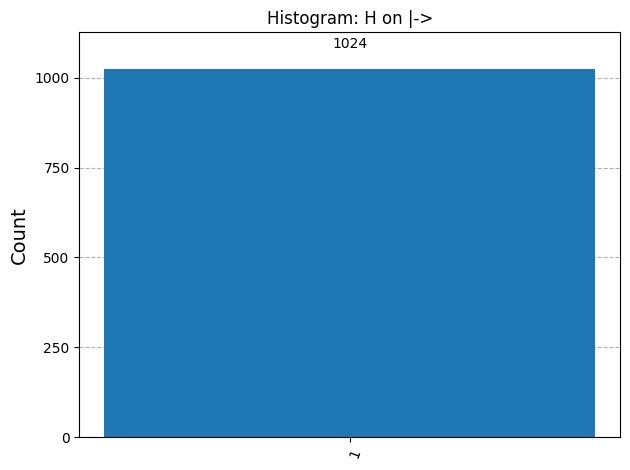



Statevector (H⊗H⊗H on |000>): [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


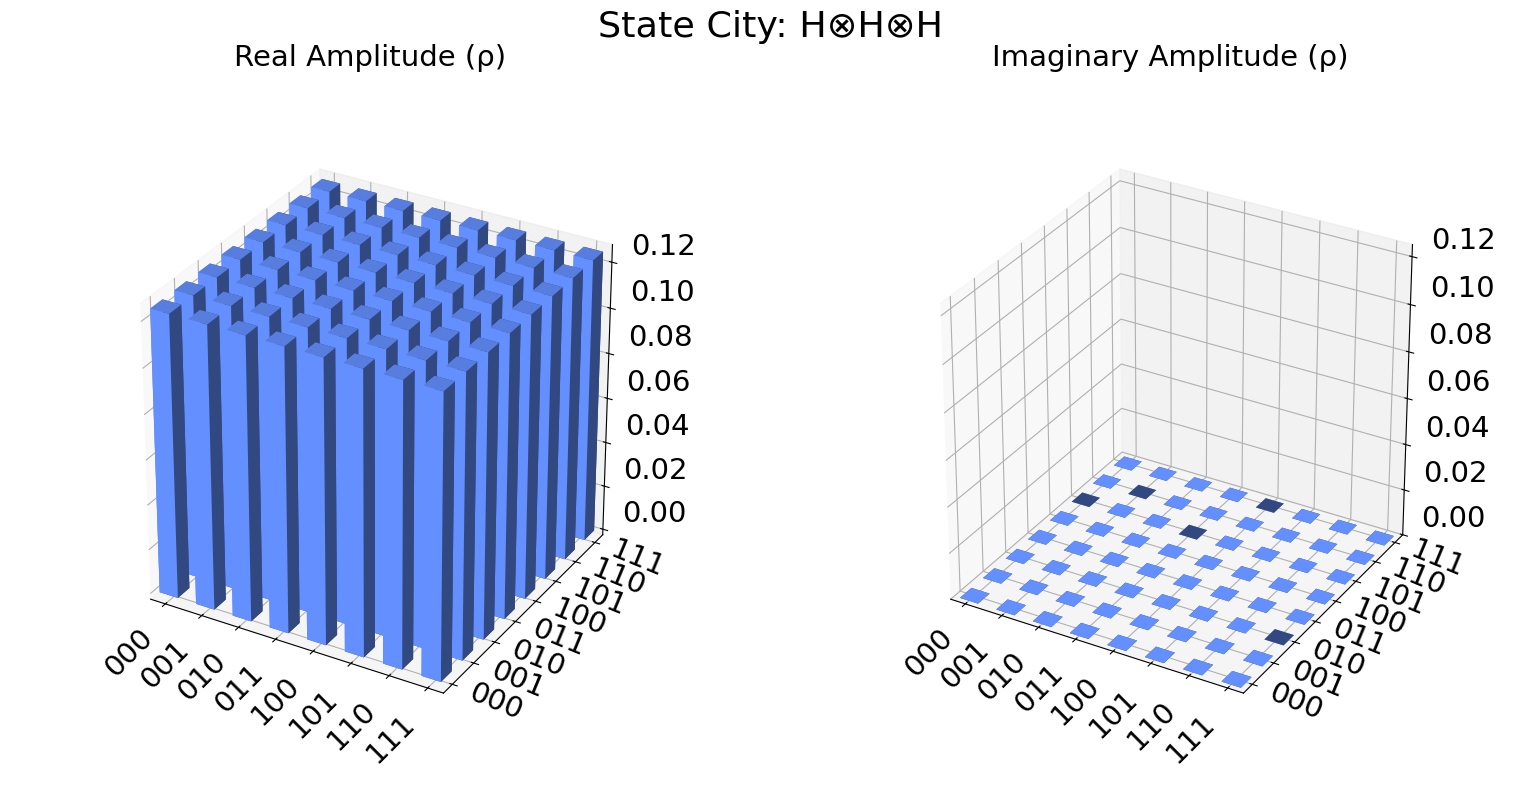

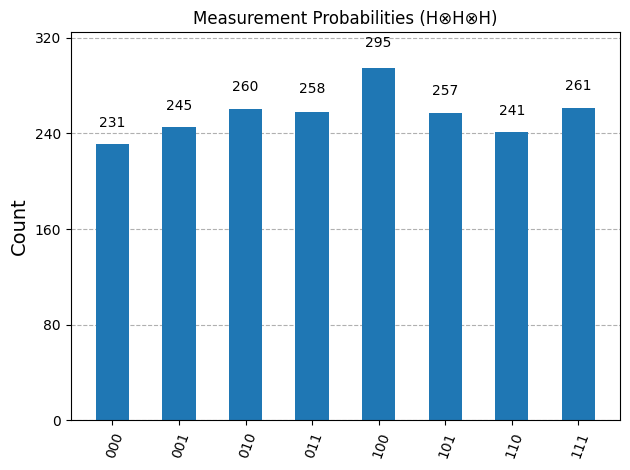

GHZ statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


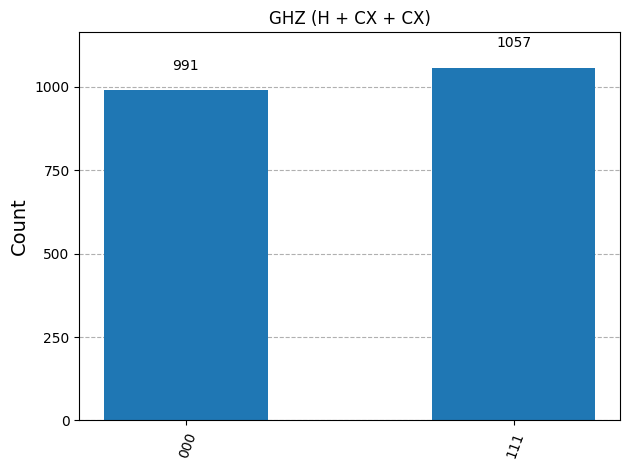

After H twice on |1>: [0.+0.j 1.+0.j]


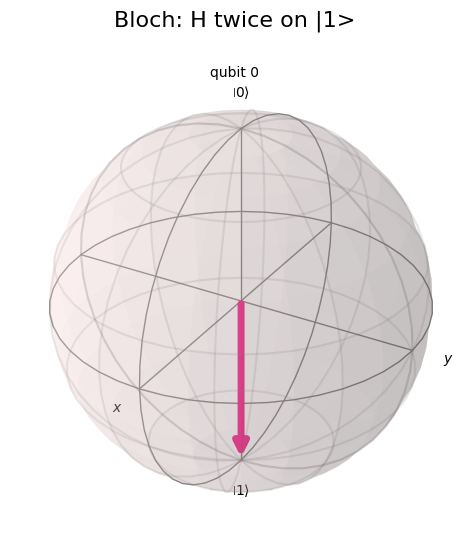

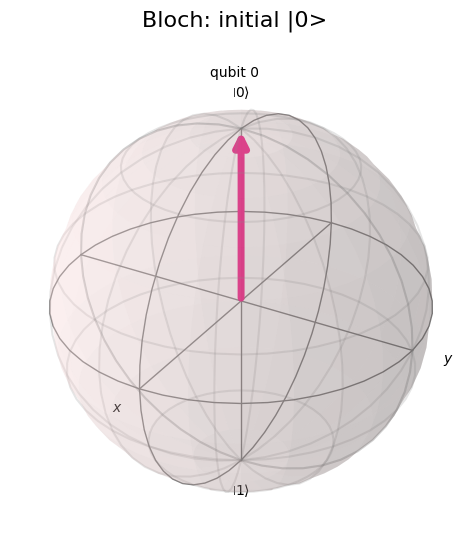

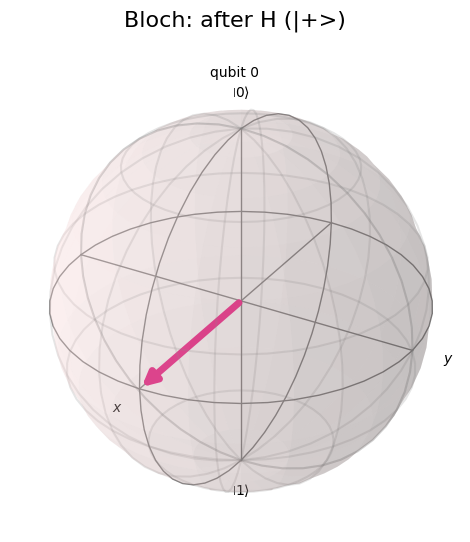

In [2]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# Install dependencies (run once)
!pip install qiskit qiskit-aer --quiet

# Imports
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

# -------------------------------------
# 1️⃣ Single-qubit Hadamard operations
# -------------------------------------
def visualize_hadamard(init_state_vector, label):
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard:", state_after.data)
    display(plot_bloch_multivector(state_after, title=f"Bloch: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Histogram: H on {label}"))
    print("\n")

# Run single-qubit tests
visualize_hadamard(np.array([1, 0]), "|0>")
visualize_hadamard(np.array([0, 1]), "|1>")
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


# -------------------------------------
# 2️⃣ Three-qubit H⊗H⊗H
# -------------------------------------
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

# Statevector (before measurement)
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)
print("Statevector (H⊗H⊗H on |000>):", state3.data)
display(plot_state_city(state3, title="State City: H⊗H⊗H"))

# Simulation
sim = AerSimulator()
tqc3 = transpile(qc3, sim)
res3 = sim.run(tqc3, shots=2048).result()
counts3 = res3.get_counts()
display(plot_histogram(counts3, title="Measurement Probabilities (H⊗H⊗H)"))


# -------------------------------------
# 3️⃣ H + CX + CX → GHZ correlations
# -------------------------------------
qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
qc_ghz.measure([0, 1, 2], [0, 1, 2])

qc_sv = QuantumCircuit(3)
qc_sv.h(0)
qc_sv.cx(0, 1)
qc_sv.cx(0, 2)
state_ghz = Statevector.from_instruction(qc_sv)
print("GHZ statevector:", state_ghz.data)

tqc_ghz = transpile(qc_ghz, sim)
res_ghz = sim.run(tqc_ghz, shots=2048).result()
counts_ghz = res_ghz.get_counts()
display(plot_histogram(counts_ghz, title="GHZ (H + CX + CX)"))


# -------------------------------------
# 4️⃣ Verify H twice on |1> → |1>
# -------------------------------------
qc_h2 = QuantumCircuit(1)
qc_h2.initialize([0, 1], 0)
qc_h2.h(0)
qc_h2.h(0)
state_h2 = Statevector.from_instruction(qc_h2)
print("After H twice on |1>:", state_h2.data)
display(plot_bloch_multivector(state_h2, title="Bloch: H twice on |1>"))


# -------------------------------------
# 5️⃣ Bloch visualization examples
# -------------------------------------
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# |0> initial state
sv0 = Statevector([1, 0])  # |0>

# Apply H to |0>
qc_h = QuantumCircuit(1)
qc_h.h(0)
sv_after = Statevector.from_instruction(qc_h)  # ✅ Correct method

# Plot Bloch spheres
display(plot_bloch_multivector(sv0, title="Bloch: initial |0>"))
display(plot_bloch_multivector(sv_after, title="Bloch: after H (|+>)"))

--- Two-Qubit H⊗H on |00> ---
Statevector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


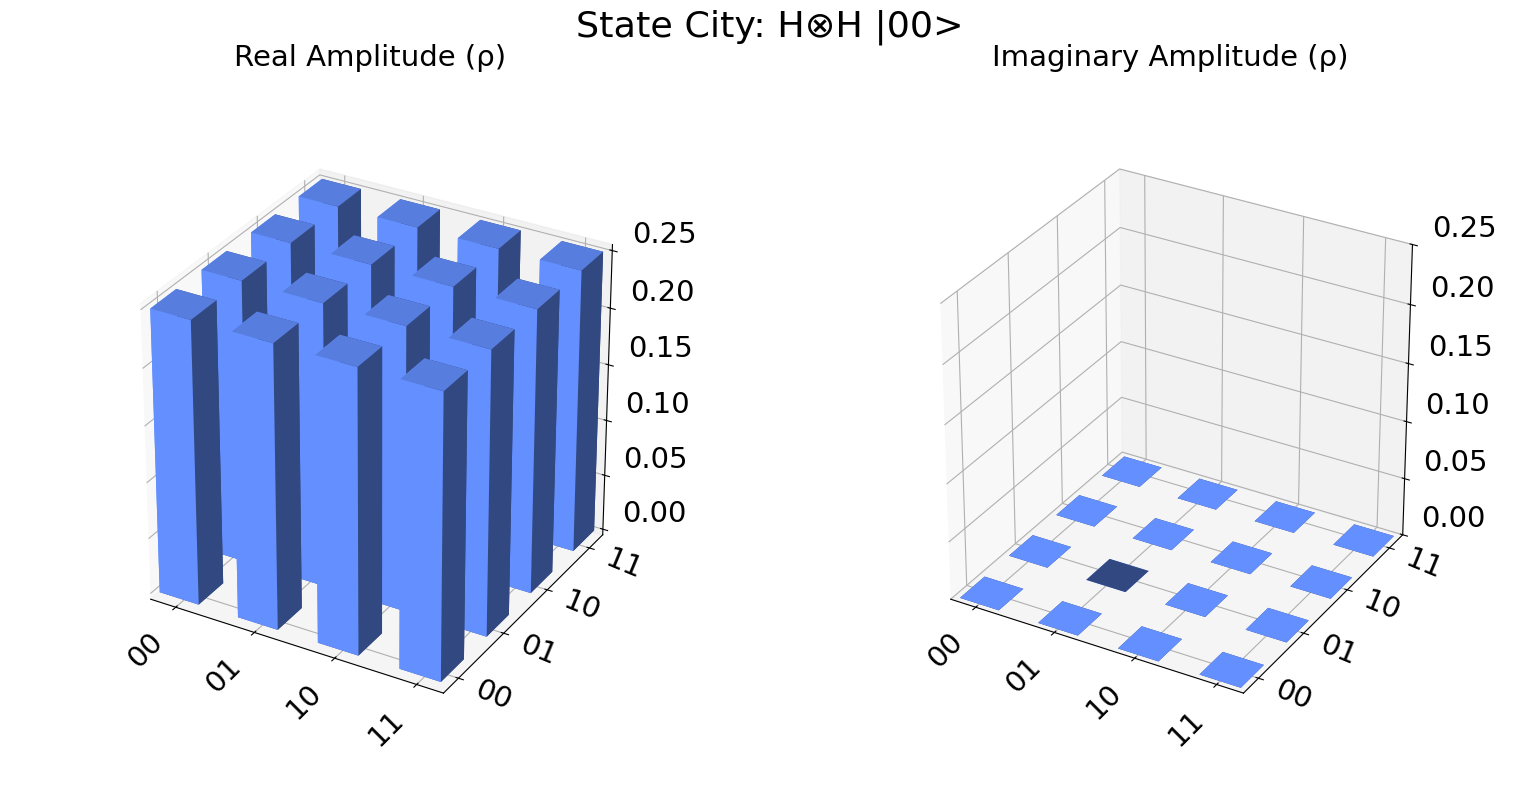

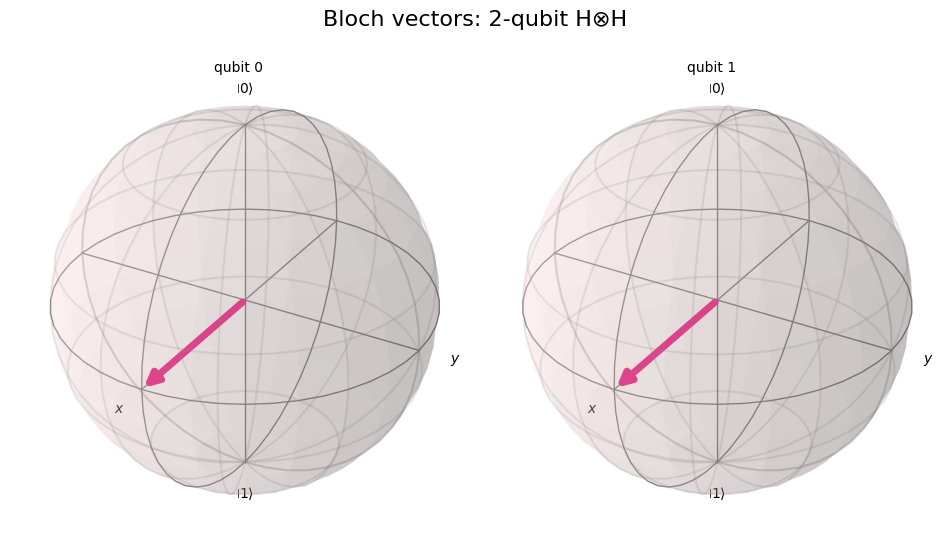

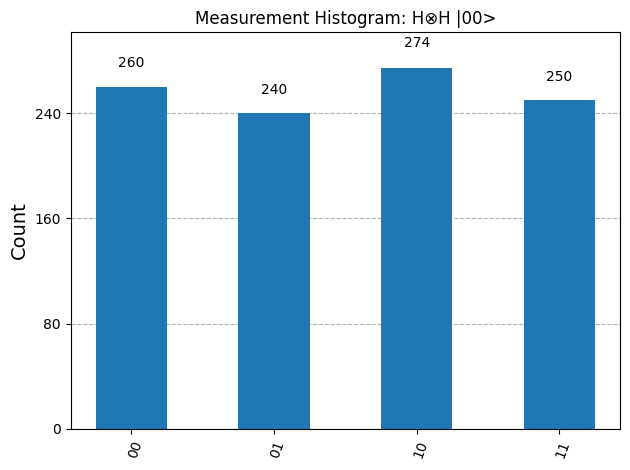


Analytical: equal probability for |00>, |01>, |10>, |11>.



In [3]:

# -------------------------
# 4️⃣ Two Qubit System: H⊗H
# -------------------------
qc2 = QuantumCircuit(2, 2)
qc2.h([0, 1])
qc2.measure([0, 1], [0, 1])

# Statevector before measurement
qc2_state = QuantumCircuit(2)
qc2_state.h([0, 1])
state2 = Statevector.from_instruction(qc2_state)

print("--- Two-Qubit H⊗H on |00> ---")
print("Statevector:", state2.data)

display(plot_state_city(state2, title="State City: H⊗H |00>"))
display(plot_bloch_multivector(state2, title="Bloch vectors: 2-qubit H⊗H"))

# Simulation
sim = AerSimulator()
qc2_t = transpile(qc2, sim)
result2 = sim.run(qc2_t, shots=1024).result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, title="Measurement Histogram: H⊗H |00>"))
print("\nAnalytical: equal probability for |00>, |01>, |10>, |11>.\n")


--- Bell State (|00> + |11>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


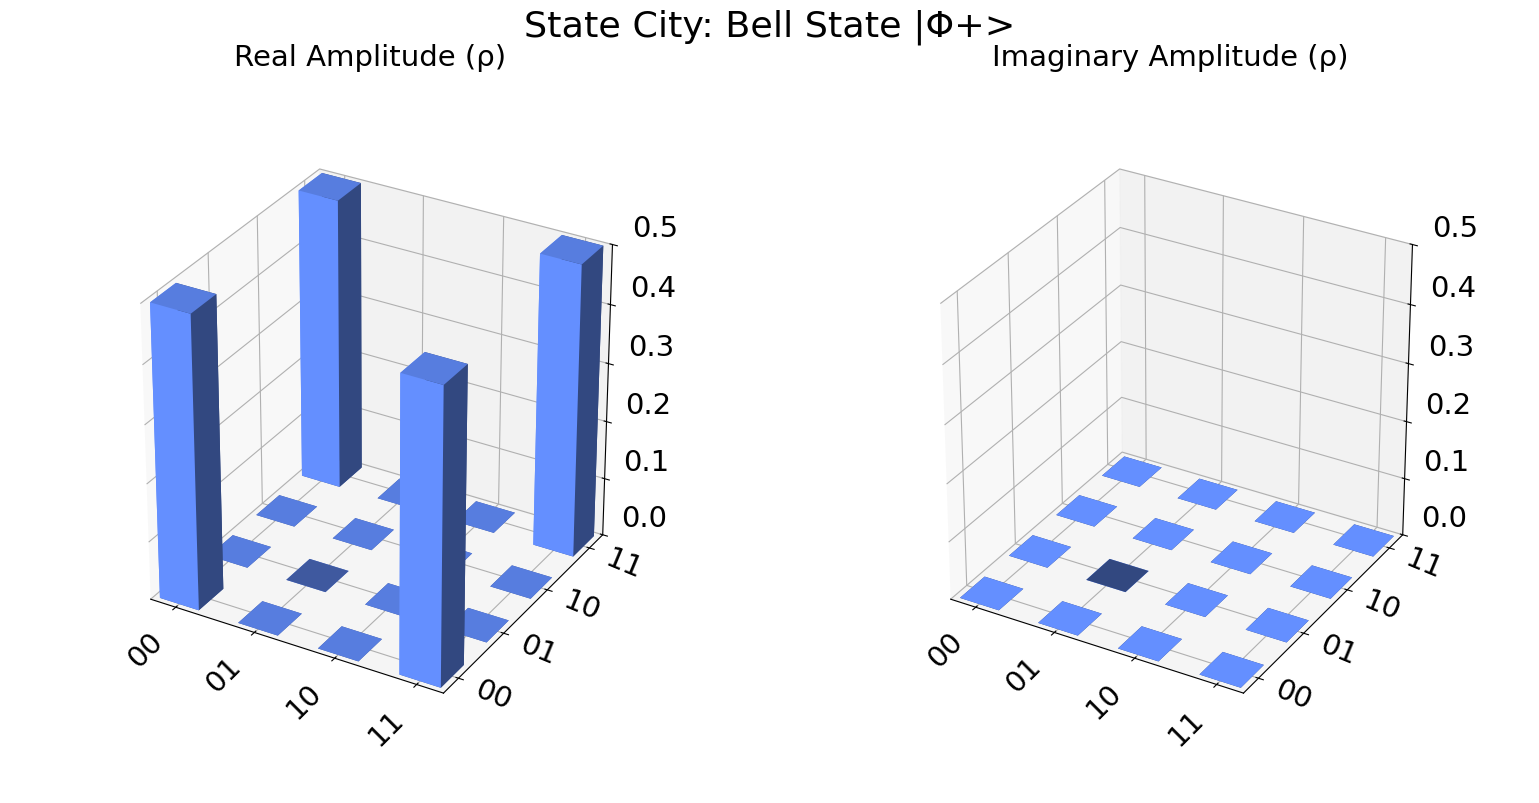

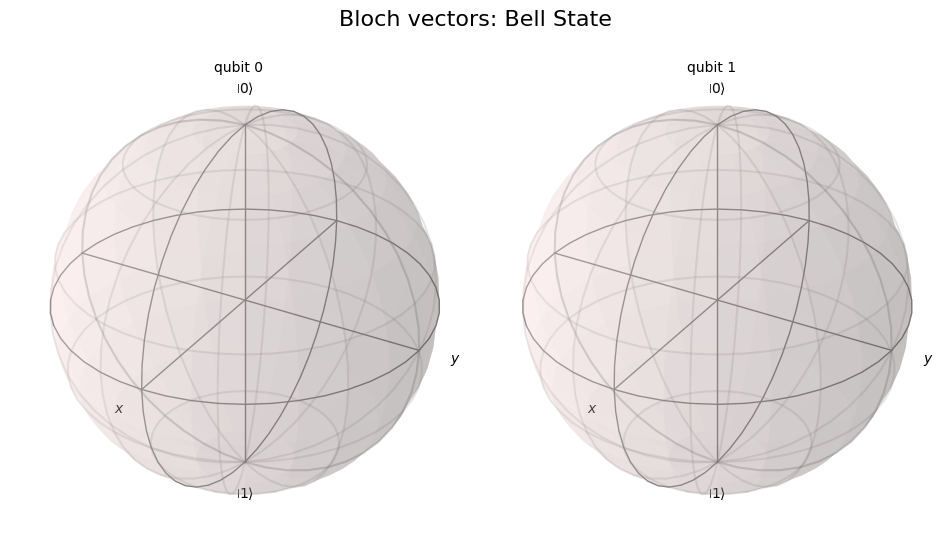

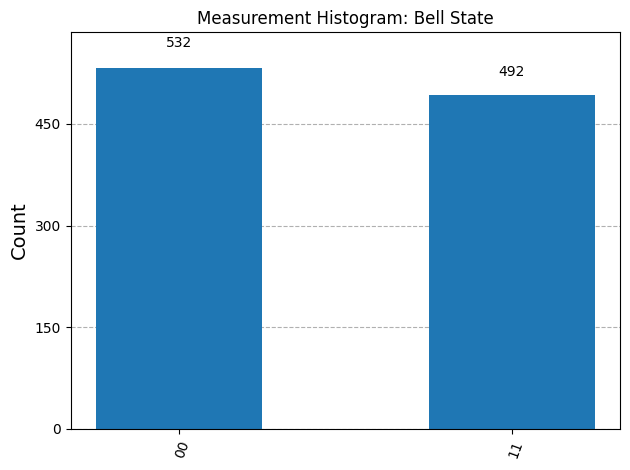


Analytical: outcomes |00> and |11> only, perfectly correlated.



In [4]:
# -------------------------
# 5️⃣ Entangled State (Bell Pair): H + CNOT
# -------------------------
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)    # Hadamard on first qubit
qc_ent.cx(0, 1)  # CNOT: entangle qubits
qc_ent.measure([0, 1], [0, 1])

# Statevector before measurement
qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)

print("--- Bell State (|00> + |11>)/√2 ---")
print("Statevector:", state_ent.data)

display(plot_state_city(state_ent, title="State City: Bell State |Φ+>"))
display(plot_bloch_multivector(state_ent, title="Bloch vectors: Bell State"))

# Simulation
qc_ent_t = transpile(qc_ent, sim)
result_ent = sim.run(qc_ent_t, shots=1024).result()
counts_ent = result_ent.get_counts()
display(plot_histogram(counts_ent, title="Measurement Histogram: Bell State"))
print("\nAnalytical: outcomes |00> and |11> only, perfectly correlated.\n")
